<a href="https://colab.research.google.com/github/michaufsc/NSP/blob/main/bioactivity_prediction_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QSAR Model 
Read in data

In [1]:
import pandas as pd

In [2]:
dataset_url = '/content/drive/MyDrive/Colab Notebooks/data/NSP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.468521
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.443697
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.769551
58,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.823909
59,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.638272
60,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
60,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0     6.468521
1     6.443697
2     5.301030
3     5.795880
4     5.698970
        ...   
57    5.769551
58    5.823909
59    5.638272
60    7.387216
61    6.309804
Name: pIC50, Length: 62, dtype: float64

Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP21,PubchemFP23,PubchemFP24,PubchemFP30,PubchemFP31,PubchemFP33,...,PubchemFP779,PubchemFP784,PubchemFP788,PubchemFP798,PubchemFP800,PubchemFP807,PubchemFP809,PubchemFP821,PubchemFP828,PubchemFP833
0,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
59,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

Random Forest Regression Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9256833175162495

Model Prediction

In [9]:
Y_pred = model.predict(X)
Y_pred

array([6.16201588, 6.32138649, 5.52753982, 5.61908903, 5.65108401,
       4.89287088, 4.84351534, 4.76531713, 5.35717329, 5.89803567,
       5.60995455, 6.54707756, 4.73870219, 5.09535655, 5.28403594,
       5.24092824, 5.06187704, 4.85207881, 5.01865034, 5.74448201,
       5.09380168, 5.94178738, 5.31055164, 5.21781007, 4.80783976,
       4.46899481, 4.43436515, 4.47815009, 5.67511265, 4.59762993,
       4.82321579, 4.84554436, 4.82912326, 5.50181308, 5.66945952,
       3.78565238, 3.43624782, 3.59642798, 3.74151655, 3.64318528,
       4.3522799 , 3.82253021, 3.53722308, 3.48761222, 3.47991081,
       3.81951607, 3.56598344, 3.90949916, 4.53104481, 3.46621612,
       3.495067  , 4.0211552 , 3.74076877, 3.57050027, 4.99517686,
       4.72549467, 5.71096795, 5.87209488, 5.66695141, 5.73519865,
       6.7537598 , 5.94326491])

model performace

In [10]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): 0.93


Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

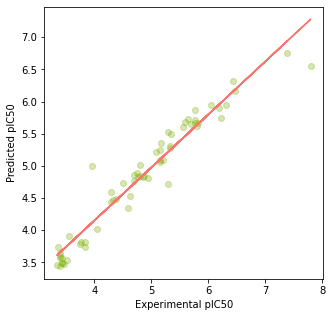

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [13]:
import pickle

In [14]:
pickle.dump(model, open('NSP_model.pkl', 'wb'))